**I have created this project as part of freecodecamp Tensorflow course**

In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 25
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [3]:
total_train, total_val, total_test # its actually (2000,1000,50) that 1 shown extra is not a image its a folder

(2001, 1001, 51)

###Reason for Creating a Folder Inside ''test'' Folder
1. The **flow_from_directory** method infers class labels from subdirectory names.

2. If no subdirectories are present, the method cannot assign labels to the images, leading to an error.

3. For the **test** dataset, even if you don't need labels during testing (e.g., when **class_mode=None**), the subdirectory structure is still required for the method to locate and load images correctly.

4. So creating a new folder named image inside the test folder.





In [4]:
if not os.path.exists('/content/cats_and_dogs/test/image'):
  os.mkdir('/content/cats_and_dogs/test/image')

for file in os.listdir(test_dir):
    file_path = os.path.join(test_dir, file)
    if os.path.isfile(file_path):  # Make sure it's a file (not a directory)
        os.rename(file_path, os.path.join('/content/cats_and_dogs/test/image', file))
print(os.listdir("/content/cats_and_dogs/test/image"))

['14.jpg', '4.jpg', '30.jpg', '49.jpg', '40.jpg', '50.jpg', '12.jpg', '15.jpg', '27.jpg', '.DS_Store', '10.jpg', '23.jpg', '22.jpg', '39.jpg', '18.jpg', '19.jpg', '1.jpg', '36.jpg', '35.jpg', '42.jpg', '44.jpg', '33.jpg', '46.jpg', '3.jpg', '24.jpg', '11.jpg', '43.jpg', '34.jpg', '5.jpg', '41.jpg', '37.jpg', '29.jpg', '8.jpg', '2.jpg', '25.jpg', '28.jpg', '7.jpg', '13.jpg', '45.jpg', '38.jpg', '20.jpg', '47.jpg', '17.jpg', '9.jpg', '48.jpg', '26.jpg', '16.jpg', '21.jpg', '6.jpg', '31.jpg', '32.jpg']


**Lets Check Whether the data is balanced or not for training the model**

In [5]:
from tensorflow import keras

train_data_gen = keras.utils.image_dataset_from_directory(directory=train_dir,
                                                           image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           labels="inferred",
                                                           label_mode="int",
                                                           color_mode="rgb",
                                                           batch_size = 128)

Found 2000 files belonging to 2 classes.


In [6]:
class_names = train_data_gen.class_names
print("Class Names:", class_names)
class_counts = {class_name: 0 for class_name in class_names}
class_counts

Class Names: ['cats', 'dogs']


{'cats': 0, 'dogs': 0}

In [7]:
for image , label in train_data_gen:
  labels = label.numpy()
  for label in labels:
      class_name = class_names[label]
      class_counts[class_name] += 1
print("Class Distribution:", class_counts)

Class Distribution: {'cats': 1000, 'dogs': 1000}


**Lets Rescale and Create a dataset from the images**

In [8]:
# 3
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                                           batch_size=batch_size,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')
val_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir,
                                                              batch_size=batch_size,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')
test_data_gen = test_image_generator.flow_from_directory(directory=test_dir,
                                                              batch_size=batch_size,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode=None,
                                                              shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


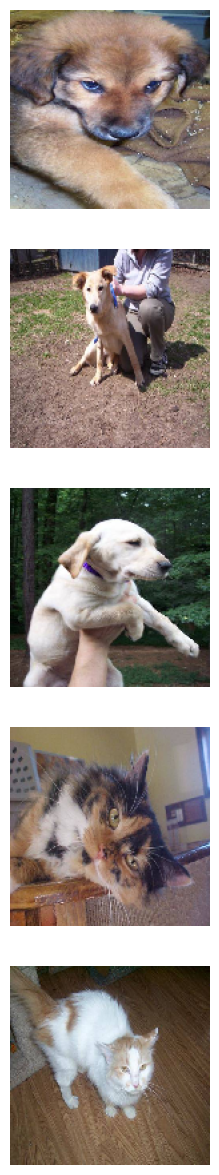

In [9]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

Since we have small dataset Lets do **Data Agumentation** to increase the size of the train dataset to prevent overfitting and improve its ability to generalize well with unseen data

In [10]:
# 5
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                        horizontal_flip=True,
                                                                        vertical_flip=True,
                                                                        rotation_range=40,
                                                                        shear_range=0.2,
                                                                        width_shift_range=0.2,
                                                                        height_shift_range=0.2
                                                                        )

Found 2000 images belonging to 2 classes.


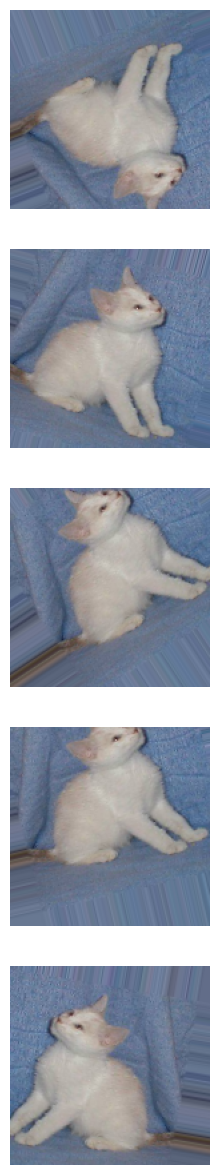

In [11]:
# 6 Data Augumented Train Dataset
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

###Cnn Model Creation

In [12]:
# 7
model = Sequential()

model.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding='same', activation='relu'))

model.add(Flatten())

model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 87616)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │         175,234 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 231,554 (904.51 KB)

 Trainable params: 231,554 (904.51 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
train_data_gen.class_indices

{'cats': 0, 'dogs': 1}

1. During training the model may generalize, overfit or underfit randomly so its not a guarantee that the final model is a generalized one so in order to find the generalized one i am adding a **chechpoint** to continously monitor validation loss and save the model when it has minimum loss(**mode = 'min'**) in the filepath specified through out the training process.
2. Added **earlystop** to stop the training if the validation loss does not show improvement for the 5 epoches continously(it means that the model is not learning anything from the dataset).
3. Specified **steps_per_epoch**, **validation_steps** to ensures control, accurate metrics, and full dataset utilization. Crucial for dataset created using **flow_from_directory** (generators).

In [14]:
#8
checkpoint = ModelCheckpoint(filepath= 'best_model.keras' ,
                             monitor= 'val_loss',
                             save_best_only=True,
                             mode = 'min',
                             verbose=1
                             )

early_stop = EarlyStopping(monitor= 'val_loss',
                           patience = 5,
                           restore_best_weights = True,
                           verbose =1)

history = model.fit(train_data_gen,
          steps_per_epoch= total_train // batch_size ,
          epochs= 25,
          validation_data=val_data_gen,
          validation_steps=total_val // batch_size,
          callbacks = [checkpoint, early_stop]
                    )

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 691ms/step - accuracy: 0.4724 - loss: 0.8393
Epoch 1: val_loss improved from inf to 0.69836, saving model to best_model.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 29s 978ms/step - accuracy: 0.4740 - loss: 0.8342 - val_accuracy: 0.5045 - val_loss: 0.6984
Epoch 2/25
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.5000 - loss: 0.6961

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss did not improve from 0.69836
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 476ms/step - accuracy: 0.5000 - loss: 0.6961 - val_accuracy: 0.4615 - val_loss: 0.7057
Epoch 3/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.5170 - loss: 0.6929
Epoch 3: val_loss improved from 0.69836 to 0.69286, saving model to best_model.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 622ms/step - accuracy: 0.5158 - loss: 0.6930 - val_accuracy: 0.5033 - val_loss: 0.6929
Epoch 4/25
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.5391 - loss: 0.6924
Epoch 4: val_loss did not improve from 0.69286
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5391 - loss: 0.6924 - val_accuracy: 0.4712 - val_loss: 0.6936
Epoch 5/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - accuracy: 0.5083 - loss: 0.6929
Epoch 5: val_loss improved from 0.69286 to 0.69260, saving model to best_model.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 634ms/step - accuracy: 0.5078 - loss: 0.6930 - val_accuracy: 0.4967 - val_loss: 0.6926
Epoch 6/2

###Training and Validation Visualization

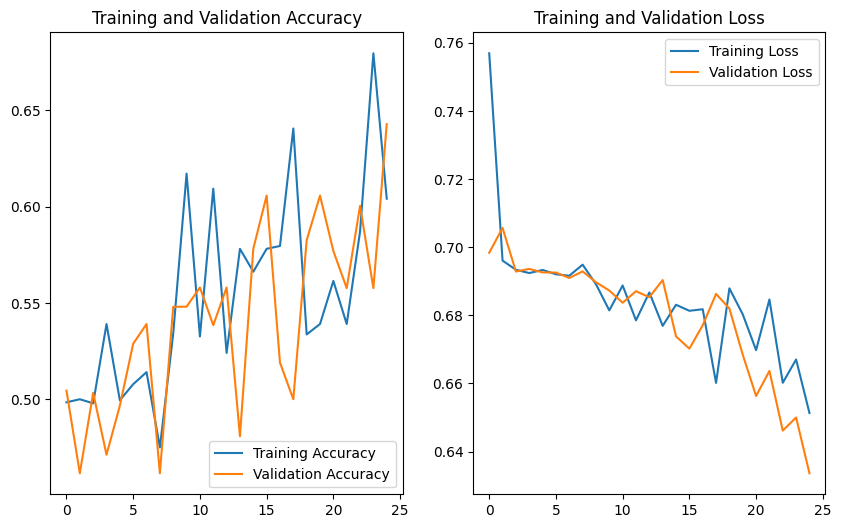

In [15]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 25
epochs_range = range(epochs)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
# to load the saved model for testing

from tensorflow.keras.models import load_model
model = load_model('best_model.keras')

In [17]:
# 10 & 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0
probabilities = model.predict(test_data_gen)
for probability, answer in zip(probabilities, answers):
  predicted_class = np.argmax(probability)
  if predicted_class == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Your model correctly identified 70.0% of the images of cats and dogs.
You passed the challenge!


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
predictions [[1.9744201e-08 1.0000000e+00]]


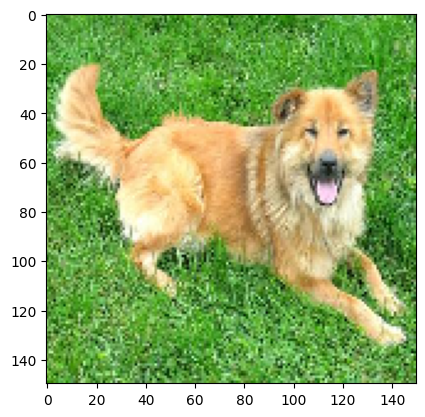

In [18]:
import random

m = random.randint(0, 49)
image = test_data_gen[0][m]
plt.imshow(image)
# Reshape the image to add a batch dimension
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# Now you can predict on the reshaped image
predictions = model.predict(image)
print("predictions",predictions)